**Autor: German Bertachini - 58750**

# Redes Neuronales - Trabajo Practico N1

## Clasificacion Multiclase

Se cuenta con el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Yeast) para formar para construir un algoritmo de clasificacion multiclase.


### Librerías a utilizar

In [575]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

#### Armamos nuestro dataframe usando Pandas

In [ ]:
#features
featured_classes = ['MIT','NUC','CYT','ME1','ME2','ME3','EXC','POX']
classes =['Class']
sequences =['sequence']
features = ['mcg','gvh','alm','mit','erl','pox','vac','nuc']
keys=["mcg","alm","gvh","mit","vac","nuc"]

cols= sequences + features + classes
data_frame= pd.read_csv('yeast.data', names=cols, sep='\s+')


In [73]:
data_frame

,sequence,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


Se analiza el data frame obtenido buscando patrones. Contamos con 1483 muestras de de un subconjunto de 10 clases de proteneinas, las cuales se tienen asociadas 8 parametros.

In [4]:
print(data_frame.shape)

(1484, 10)


Distribucion probabilistica de los parametros.

In [5]:
data_frame.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


## Balance de clases

Realizamos el estudio sobre el balance de clases de nuestro dataset. Siendo las clases con mayor representacion CYT, NUC, MIT y ME3.

In [149]:
data_frame["Class"].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: Class, dtype: int64

A continuacion, se muestra el respectivo histograma.

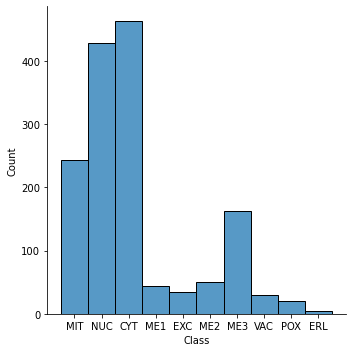

In [172]:
sns.displot(data_frame["Class"])

Me fijo cuantas secuencias hay para cada clase, normalizadas, y lo represento en un histograma.

In [190]:
data_frame["Class"].value_counts()/len(data_frame)

CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: Class, dtype: float64

<AxesSubplot:title={'center':'Balance de clases normalizado'}, ylabel='Probabilidad'>

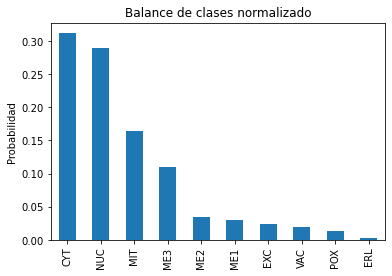

In [ ]:
(data_frame["Class"].value_counts()/len(data_frame)).plot(kind='bar',ylabel='Probabilidad',title="Balance de clases normalizado")

Se busca la distribucion de cada uno de mis parametros del dataset.

In [196]:
#data_frame["mcg"]=(data_frame["mcg"]-data_frame["mcg"].min())/(data_frame["mcg"].max()-data_frame["mcg"].min())
#data_frame["mcg"]=((data_frame["mcg"]-data_frame["mcg"].mean())/data_frame["mcg"].std())/data_frame["mcg"].max()
#data_frame["gvh"]=(data_frame["gvh"]-data_frame["gvh"].mean())/data_frame["gvh"].std()


C:\Users\germa\AppData\Local\Temp\ipykernel_2912\3727677485.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_frame.drop(columns="Class").hist(ax=ax,bins=70)


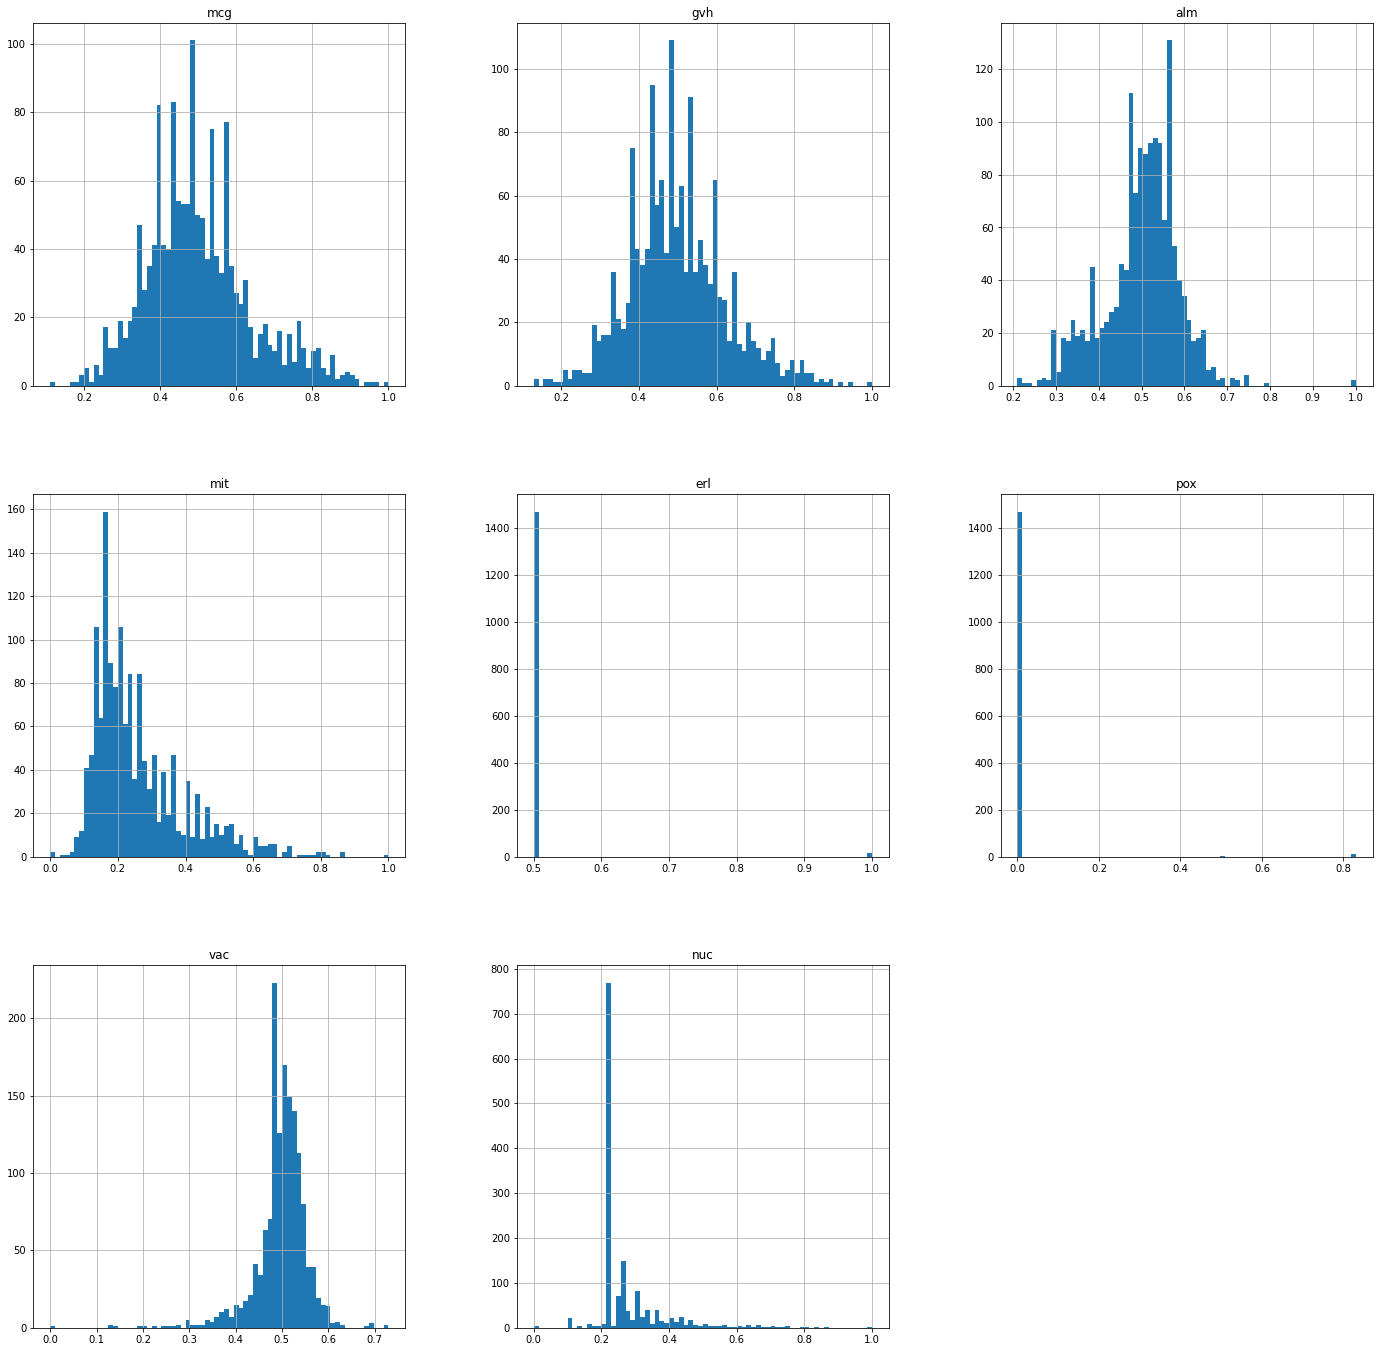

In [198]:
fig,ax=plt.subplots(figsize=(24,24))
data_frame.drop(columns="Class").hist(ax=ax,bins=70)
#data_frame[data_frame["class"] == "CYT"].plot.hist()
plt.show()

Se busca la distribucion de cada parametro pero para cada clase en particular.

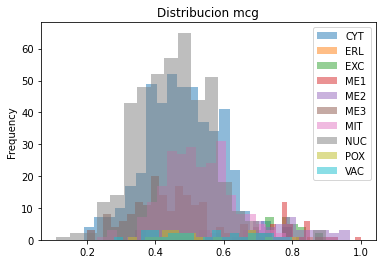

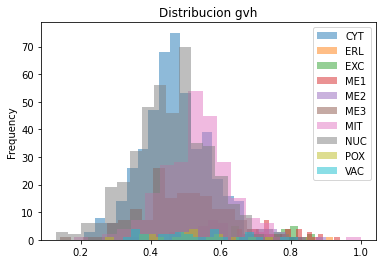

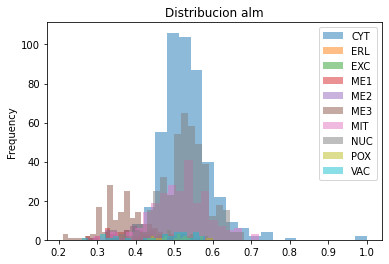

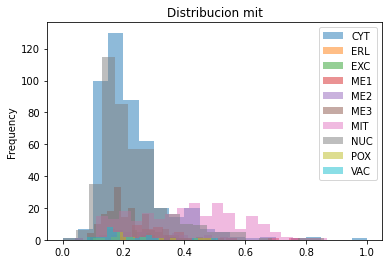

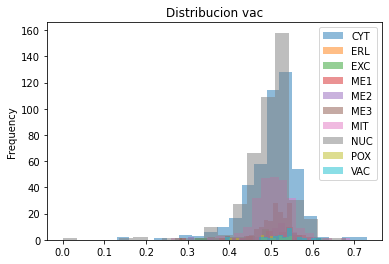

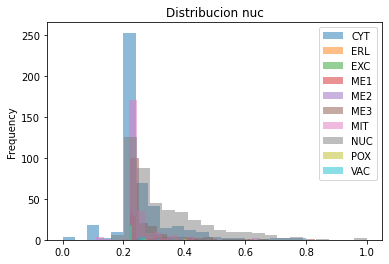

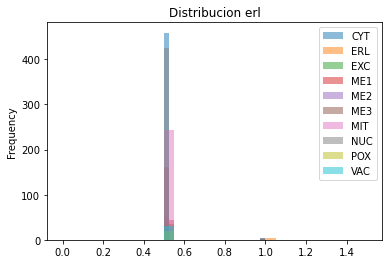

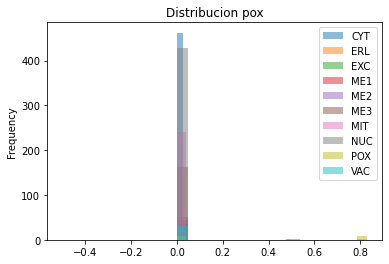

In [247]:
data_frame.groupby("Class").mcg.plot.hist(alpha=0.5,bins=20,title="Distribucion mcg")
plt.legend()
plt.show()
data_frame.groupby("Class").gvh.plot.hist(alpha=0.5,bins=20,title="Distribucion gvh")
plt.legend()
plt.show()
data_frame.groupby("Class").alm.plot.hist(alpha=0.5,bins=20,title="Distribucion alm")
plt.legend()
plt.show()
data_frame.groupby("Class").mit.plot.hist(alpha=0.5,bins=20,title="Distribucion mit")
plt.legend()
plt.show()
data_frame.groupby("Class").vac.plot.hist(alpha=0.5,bins=20,title="Distribucion vac")
plt.legend()
plt.show()
data_frame.groupby("Class").nuc.plot.hist(alpha=0.5,bins=20,title="Distribucion nuc")
plt.legend()
plt.show()
data_frame.groupby("Class").erl.plot.hist(alpha=0.5,bins=20,title="Distribucion erl")
plt.legend()
plt.show()
data_frame.groupby("Class").pox.plot.hist(alpha=0.5,bins=20,title="Distribucion pox")
plt.legend()
plt.show()

<Figure size 3600x3600 with 0 Axes>

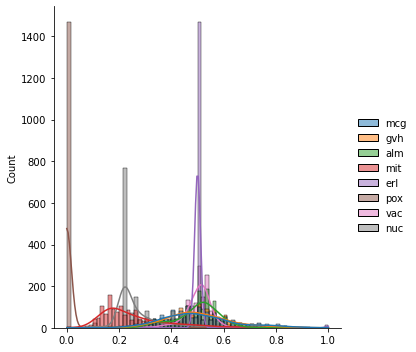

In [217]:
plt.figure(figsize=(50,50))
ax= sns.displot(data_frame.drop(columns="Class"), kde=True,bins=70)

A continuacion, se analiza la correlacion entre parametros.

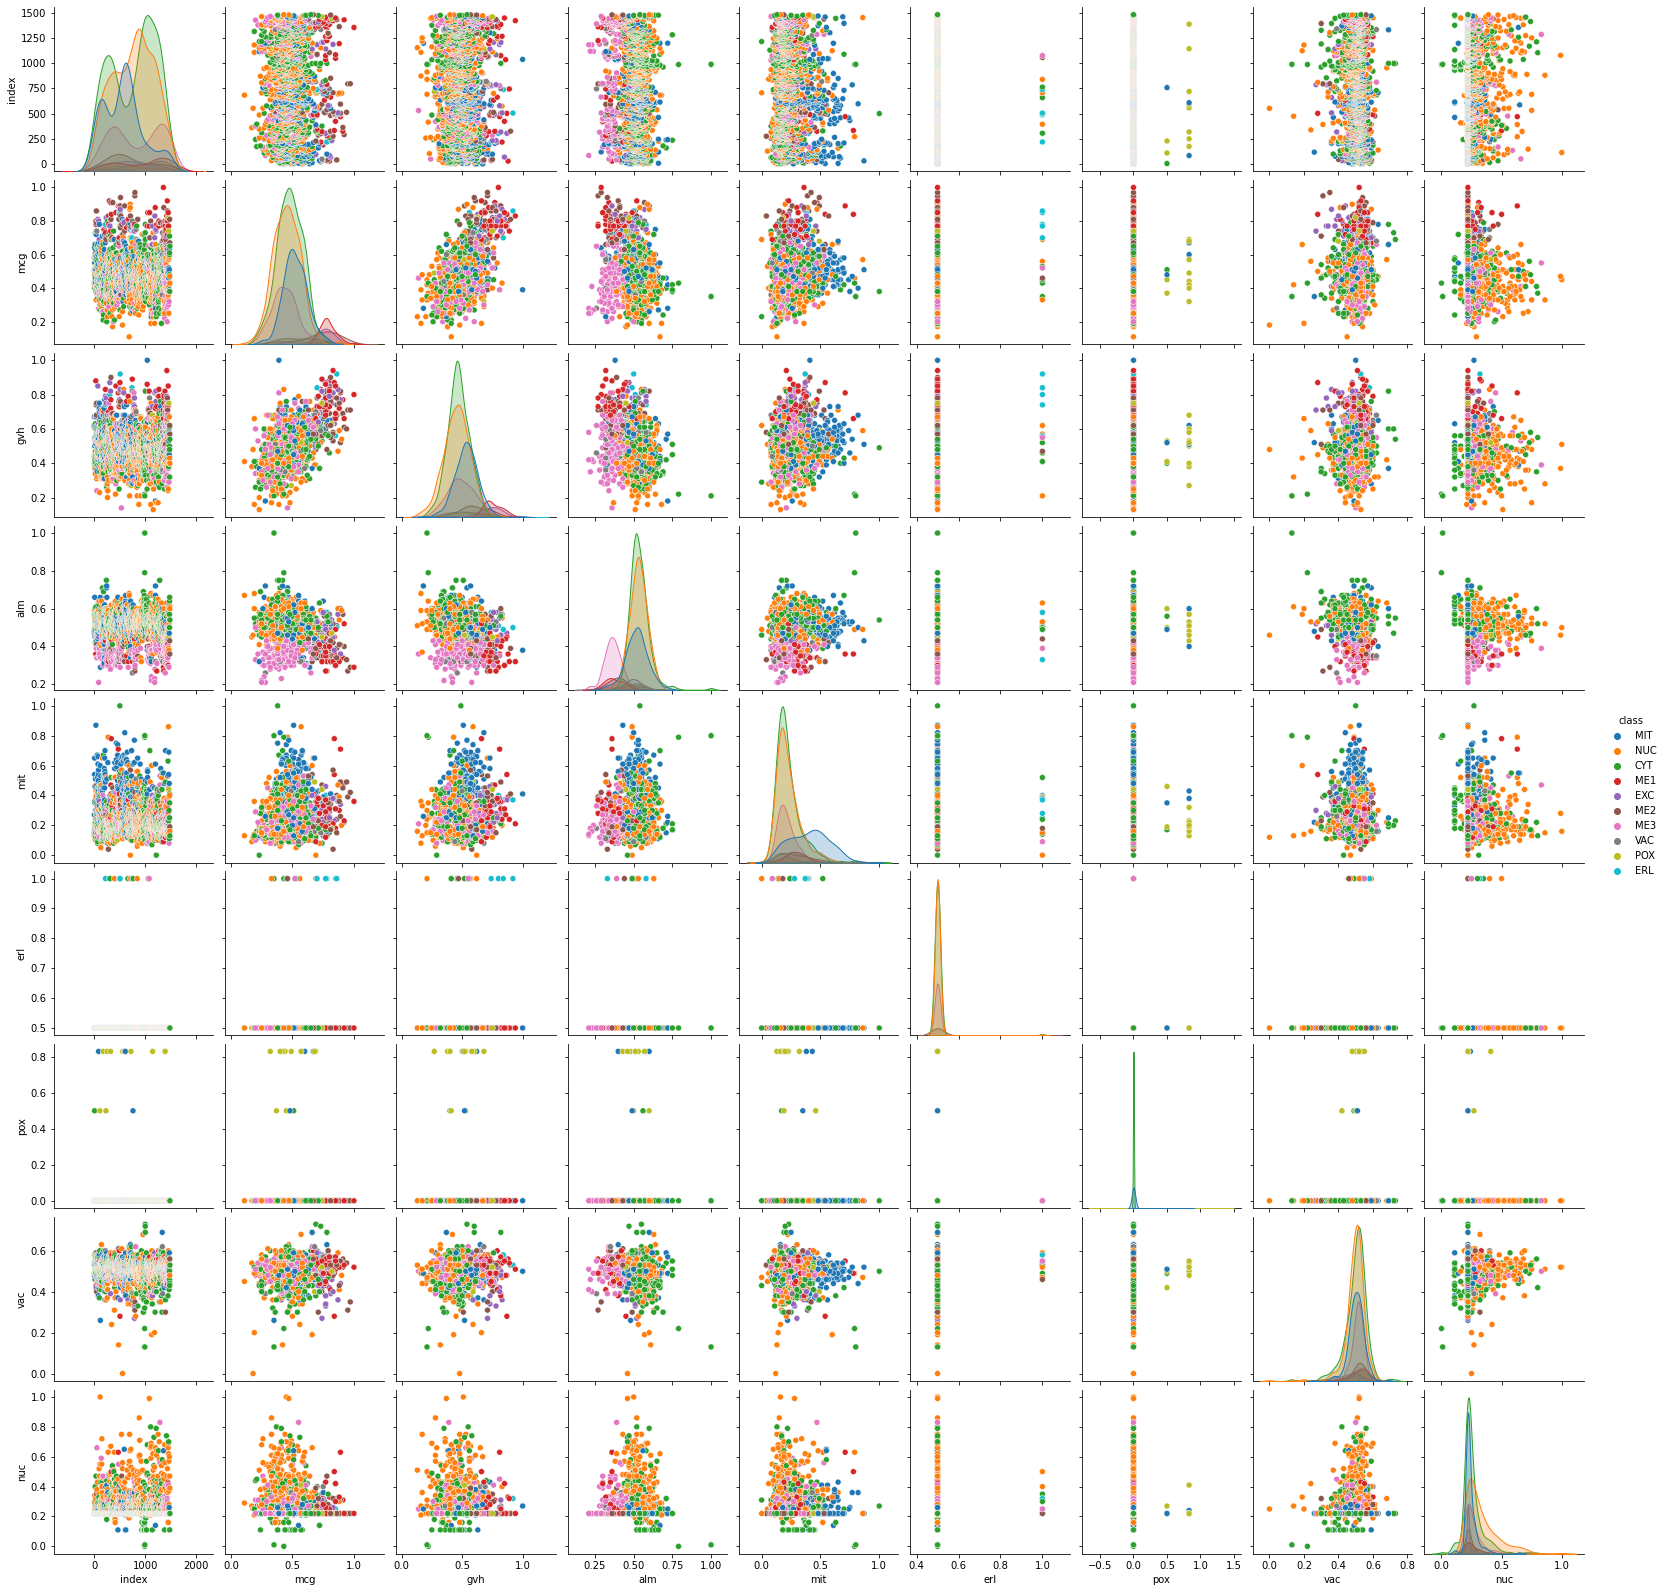

In [10]:
sns.pairplot(data_frame.reset_index(),hue='class')

No se logra llegar a ningun analisis concluyente.
Se procedera a realizar el analisis con las clases CYT, NUC, MIT y ME1 ya que son las que cuentan con mayor cantidad de muestras.
Tambien se eliminan los parametros erl y pox al no tener una distribucion gauseana y tener una relacion dificil de identificar.

In [335]:
reduced_df=data_frame[data_frame["Class"]!="POX"]
reduced_df=reduced_df[reduced_df["Class"]!="ME2"]
reduced_df=reduced_df[reduced_df["Class"]!="ME3"]
reduced_df=reduced_df[reduced_df["Class"]!="EXC"]
reduced_df=reduced_df[reduced_df["Class"]!="VAC"]
reduced_df=reduced_df[reduced_df["Class"]!="ERL"]
reduced_df.drop(["sequence"], axis=1, inplace=True)
reduced_df.drop(["pox"], axis=1, inplace=True)
reduced_df.drop(["erl"], axis=1, inplace=True)


In [336]:
reduced_df

,mcg,gvh,alm,mit,vac,nuc,Class
0,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.48,0.22,MIT
...,...,...,...,...,...,...,...
1477,0.38,0.32,0.64,0.41,0.44,0.11,CYT
1478,0.38,0.40,0.66,0.35,0.43,0.11,CYT
1480,0.47,0.43,0.61,0.40,0.48,0.47,NUC
1482,0.43,0.40,0.60,0.16,0.53,0.39,NUC


## Data set filtrado

Nuevo balance de clases

In [244]:
reduced_df["Class"].value_counts()/len(reduced_df)

CYT    0.392373
NUC    0.363559
MIT    0.206780
ME1    0.037288
Name: Class, dtype: float64

Histograma del nuevo balance de clases


<AxesSubplot:title={'center':'Balance de clases normalizado y filtrado'}, ylabel='Probabilidad'>

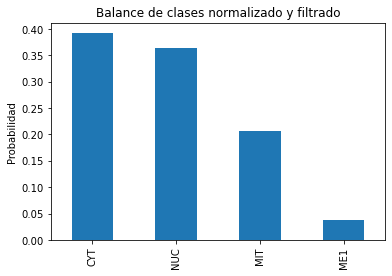

In [245]:
(reduced_df["Class"].value_counts()/len(reduced_df)).plot(kind='bar',ylabel='Probabilidad',title="Balance de clases normalizado y filtrado")

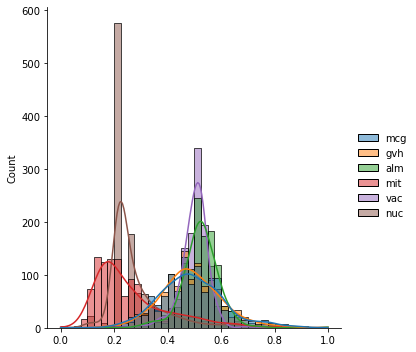

In [249]:
ax= sns.displot(reduced_df.drop(columns="Class"), kde=True,bins=40)

## Normalizacion


Normalizo mi dataset.

In [252]:
reduced_df["mcg"] = (reduced_df["mcg"] - reduced_df["mcg"].mean())/reduced_df["mcg"].std()
reduced_df["gvh"] = (reduced_df["gvh"] - reduced_df["gvh"].mean())/reduced_df["gvh"].std()
reduced_df["alm"] = (reduced_df["alm"] - reduced_df["alm"].mean())/reduced_df["alm"].std()
reduced_df["vac"] = (reduced_df["vac"] - reduced_df["vac"].mean())/reduced_df["vac"].std()
reduced_df["nuc"] = (reduced_df["nuc"] - reduced_df["nuc"].mean())/reduced_df["nuc"].std()


In [349]:
reduced_df

,mcg,gvh,alm,mit,vac,nuc,Class
0,0.58,0.61,0.47,0.13,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.48,0.22,MIT
...,...,...,...,...,...,...,...
1477,0.38,0.32,0.64,0.41,0.44,0.11,CYT
1478,0.38,0.40,0.66,0.35,0.43,0.11,CYT
1480,0.47,0.43,0.61,0.40,0.48,0.47,NUC
1482,0.43,0.40,0.60,0.16,0.53,0.39,NUC


# Division y Modelado


Dividimos nuestro data set en train y test.

In [338]:
df_train,df_test=train_test_split(reduced_df, test_size=0.3, stratify=reduced_df["Class"])  

In [85]:
enc= LabelEncoder()

In [340]:
df_train[['mcg','gvh','alm','mit','vac','nuc']].values

array([[0.66, 0.43, 0.57, 0.6 , 0.19, 0.33],
       [0.38, 0.42, 0.47, 0.12, 0.47, 0.53],
       [0.46, 0.41, 0.5 , 0.44, 0.53, 0.22],
       ...,
       [0.44, 0.68, 0.45, 0.51, 0.52, 0.41],
       [0.52, 0.45, 0.53, 0.34, 0.52, 0.44],
       [0.48, 0.44, 0.51, 0.24, 0.49, 0.22]])

In [578]:
y = enc.fit_transform(df_train.Class.values)
X=df_train.drop(columns="Class").values
y_test = enc.fit_transform(df_test.Class.values)
X_test=df_test.drop(columns="Class").values

In [446]:
df_train.head()

,mcg,gvh,alm,mit,vac,nuc,Class
1125,0.66,0.43,0.57,0.60,0.19,0.33,NUC
1181,0.38,0.42,0.47,0.12,0.47,0.53,NUC
479,0.46,0.41,0.50,0.44,0.53,0.22,MIT
817,0.51,0.48,0.46,0.29,0.54,0.22,CYT
681,0.33,0.46,0.53,0.29,0.50,0.55,NUC


In [447]:
y

array([3, 3, 2, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       0, 0, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2,
       0, 0, 2, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 2, 2, 3, 3, 0, 2, 2, 0, 3,
       0, 0, 3, 3, 3, 0, 2, 3, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0, 2, 3,
       3, 0, 0, 0, 0, 0, 2, 2, 3, 3, 0, 3, 2, 0, 3, 3, 3, 0, 0, 0, 0, 2,
       3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 2,
       0, 0, 3, 2, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 3, 0, 3, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 3, 3, 2, 0, 3, 2, 3, 2, 0, 3,
       3, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 2, 2, 0, 3,
       0, 3, 0, 3, 0, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 2, 2, 0, 0, 2, 3, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0, 0, 1, 0,
       3, 0, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 2, 3, 3, 0, 2, 1, 2,
       3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 0, 3, 3, 1, 3, 0, 0, 3, 2, 3, 3, 0,
       1, 1, 3, 2, 3, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0,

# OneVsRest Classifier
Usaremos este algoritmo para nuestro problema de clasificación. Calcularemos las probabilidades de que una secuencia pertenezca o no a una clase, volviendo a una base binaria.

In [378]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

In [623]:
lr = 0.04
model = OneVsRestClassifier(SGDClassifier(loss='log_loss',penalty=None,max_iter=1000,tol=0.000001,eta0=lr)).fit(X, y)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [608]:
scores

array([0.5       , 0.57142857, 0.66666667, 0.54761905, 0.66666667,
       0.47619048, 0.58536585, 0.48780488, 0.63414634, 0.65853659,
       0.56097561, 0.65853659, 0.56097561, 0.63414634, 0.68292683,
       0.63414634, 0.6097561 , 0.48780488, 0.53658537, 0.53658537,
       0.57142857, 0.52380952, 0.47619048, 0.5952381 , 0.52380952,
       0.5952381 , 0.70731707, 0.58536585, 0.53658537, 0.48780488,
       0.53658537, 0.63414634, 0.58536585, 0.65853659, 0.58536585,
       0.63414634, 0.6097561 , 0.53658537, 0.51219512, 0.56097561,
       0.5952381 , 0.61904762, 0.5       , 0.61904762, 0.78571429,
       0.5952381 , 0.51219512, 0.41463415, 0.56097561, 0.53658537,
       0.58536585, 0.65853659, 0.43902439, 0.6097561 , 0.53658537,
       0.56097561, 0.68292683, 0.53658537, 0.48780488, 0.48780488,
       0.64285714, 0.57142857, 0.52380952, 0.73809524, 0.52380952,
       0.61904762, 0.63414634, 0.65853659, 0.46341463, 0.56097561,
       0.48780488, 0.48780488, 0.6097561 , 0.58536585, 0.63414

In [624]:
model.score(df_train[keys].values,y)

0.5677966101694916

Vemos que nuestro score es mejor que la probabilidad trivial de asumir que siempre pertenece a la clase, lo cual es un buen indicio.

In [625]:
model.score(df_test[keys].values,y_test)

0.559322033898305

Me quedo con la máxima probabilidad en cada fila, que indicara la probabilidad de que la secuencia pertenezca a la clase más probable.

In [626]:
y_prob = model.predict_proba(X_test)
y_pred = np.where(y_prob>= y_prob.max(axis = 1,  keepdims =True), 1, 0)


In [600]:
y_prob

array([[4.66998486e-01, 1.81059171e-07, 1.67391121e-01, 3.65610212e-01],
       [3.45352637e-01, 8.80774601e-06, 5.78499193e-01, 7.61393620e-02],
       [4.39278867e-01, 1.77704940e-11, 4.79819001e-01, 8.09021314e-02],
       ...,
       [5.88376188e-01, 4.76152003e-10, 2.28272034e-02, 3.88796608e-01],
       [2.71192524e-01, 2.41488041e-13, 1.47243456e-04, 7.28660232e-01],
       [3.31925696e-01, 2.88658117e-09, 4.07899551e-01, 2.60174750e-01]])

In [603]:
y_pred

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 1,
       2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3,
       0, 3, 2, 3, 0, 0, 2, 3, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 3, 0, 2, 0, 0, 2, 0, 0, 3, 2, 0, 0, 3, 0, 0, 2, 3, 0, 0, 3, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 3, 2, 3, 0, 0, 0, 1, 1, 0, 0, 3, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3,
       0, 0, 2, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 3, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 3, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0,

In [627]:
y_pred=y_pred.argmax(axis=1)

In [604]:
y_test

array([2, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 2, 3, 0, 3, 0, 0, 1,
       2, 3, 0, 0, 0, 2, 0, 2, 3, 3, 2, 3, 0, 3, 2, 3, 0, 0, 2, 0, 3, 3,
       3, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 3, 3, 2, 1, 2,
       0, 3, 3, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 2, 0, 0,
       0, 0, 3, 2, 0, 3, 3, 2, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 3, 3, 2, 3, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 2,
       2, 3, 0, 2, 3, 0, 2, 0, 0, 3, 2, 3, 3, 3, 3, 1, 1, 0, 3, 0, 2, 3,
       2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 0, 3, 2, 2,
       2, 2, 0, 3, 2, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 3, 3, 2, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3,
       2, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 1, 3, 0, 3, 3,
       0, 3, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 0, 2,
       3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 1, 2, 3, 3, 0, 3, 3,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 2, 3, 0, 0, 3, 3,

In [628]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[95,  0, 25, 19],
       [ 0, 13,  0,  0],
       [19,  0, 52,  2],
       [60,  0,  9, 60]], dtype=int64)

### Matriz de confusion 
Buscamos la matriz de confusion para mi clasificador de clases. Notamos que las clases predictas con mayor exactitud fueron ME1 y MIT.

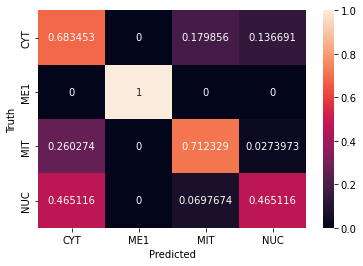

In [632]:
#log_confusion_matrix = confusion_matrix(y_test, y_pred, labels=["CYT","ME1","MIT" "NUC"])
my_confusion_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax= plt.subplot()
sns.heatmap(my_confusion_matrix, annot=True, ax=ax,  fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
ax.xaxis.set_ticklabels(["CYT","ME1","MIT","NUC"])
ax.yaxis.set_ticklabels(["CYT","ME1","MIT","NUC"]);

### Metricas

In [633]:
print(classification_report(y_test, y_pred, target_names=["CYT","ME1","MIT","NUC"]))

              precision    recall  f1-score   support

         CYT       0.55      0.68      0.61       139
         ME1       1.00      1.00      1.00        13
         MIT       0.60      0.71      0.65        73
         NUC       0.74      0.47      0.57       129

    accuracy                           0.62       354
   macro avg       0.72      0.72      0.71       354
weighted avg       0.65      0.62      0.62       354



## Caso Binario


Se elige hacer el estudio de una clasificacion binaria para las clases CYT y NUC al ser las mas representativas.

In [637]:
binary_df=reduced_df[reduced_df["Class"]!="ME1"]
binary_df=binary_df[binary_df["Class"]!="MIT"]
binary_df_train,binary_df_test=train_test_split(binary_df, test_size=0.3, stratify=binary_df["Class"])  

In [636]:
binary_df_train.head()

,mcg,gvh,alm,mit,vac,nuc,Class
1032,0.37,0.37,0.51,0.38,0.44,0.22,CYT
258,0.23,0.20,0.53,0.20,0.44,0.22,NUC
700,0.51,0.34,0.49,0.16,0.53,0.21,NUC
828,0.45,0.48,0.56,0.56,0.47,0.22,NUC
908,0.46,0.41,0.58,0.10,0.48,0.22,NUC


In [672]:
enc= LabelEncoder()
binary_y = enc.fit_transform(binary_df_train.Class.values)
binary_X=binary_df_train.drop(columns="Class").values
binary_y_test = enc.fit_transform(binary_df_test.Class.values)
binary_X_test=binary_df_test.drop(columns="Class").values

In [673]:
logistic_reg = LogisticRegression()
logistic_reg.fit(binary_X, binary_y.ravel())
binary_y_prob = logistic_reg.predict_proba(binary_X_test)
binary_y_pred = np.where(binary_y_prob > 0.5, 1, 0)

In [641]:
binary_y_pred=binary_y_pred.argmax(axis=1)
binary_y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [642]:
binary_y_prob

array([[0.30029862, 0.69970138],
       [0.62626435, 0.37373565],
       [0.2757665 , 0.7242335 ],
       [0.39538306, 0.60461694],
       [0.61734476, 0.38265524],
       [0.62626435, 0.37373565],
       [0.55607832, 0.44392168],
       [0.51603906, 0.48396094],
       [0.60729838, 0.39270162],
       [0.55186427, 0.44813573],
       [0.44649539, 0.55350461],
       [0.58618845, 0.41381155],
       [0.57681736, 0.42318264],
       [0.57729379, 0.42270621],
       [0.5820792 , 0.4179208 ],
       [0.57717642, 0.42282358],
       [0.52899749, 0.47100251],
       [0.58935204, 0.41064796],
       [0.54211869, 0.45788131],
       [0.53324932, 0.46675068],
       [0.63013684, 0.36986316],
       [0.622952  , 0.377048  ],
       [0.57437639, 0.42562361],
       [0.59815631, 0.40184369],
       [0.59942237, 0.40057763],
       [0.46044657, 0.53955343],
       [0.48798593, 0.51201407],
       [0.58913806, 0.41086194],
       [0.59574595, 0.40425405],
       [0.61018625, 0.38981375],
       [0.

In [643]:
binary_y

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,

### Curvas obtenidas 
Graficamos las probabilidades obtenidas. Se puede observar que las clases cuentan con una separabilidad razonable pero lejos está de ser perfecta. Esto era esperable ya que ya se habían observado estos problemas en la matriz de confusión para el caso multiclase.

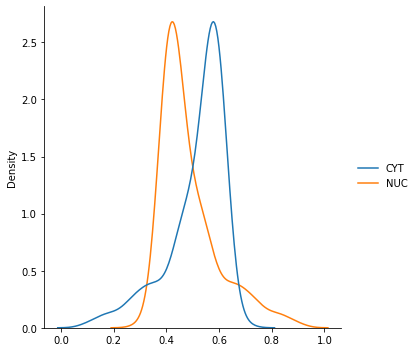

In [644]:
y_prob_frame= pd.DataFrame(binary_y_prob, columns=['CYT','NUC'])
y_prob_frame.head()
sns.displot(y_prob_frame, kind="kde")

In [572]:
y_prob_frame.head()

,CYT,NUC
0,0.567118,0.432882
1,0.263569,0.736431
2,0.226529,0.773471
3,0.554420,0.445580
4,0.615543,0.384457


In [645]:
binary_confusion_matrix = confusion_matrix(binary_y_test, binary_y_pred)

In [646]:
binary_confusion_matrix

array([[112,  27],
       [ 71,  58]], dtype=int64)

### Matriz de confusion

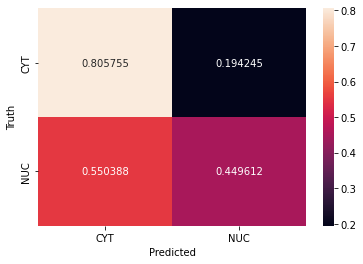

In [647]:
#log_confusion_matrix = confusion_matrix(y_test, y_pred, labels=["CYT","ME1","MIT" "NUC"])
binary_confusion_matrix = confusion_matrix(binary_y_test, binary_y_pred,normalize='true')
ax= plt.subplot()
sns.heatmap(binary_confusion_matrix, annot=True, ax=ax,  fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
ax.xaxis.set_ticklabels(["CYT","NUC"])
ax.yaxis.set_ticklabels(["CYT","NUC"]);

Métricas

In [528]:
print(classification_report(binary_y_test, binary_y_pred, target_names=["CYT","NUC"]))

              precision    recall  f1-score   support

         CYT       0.63      0.83      0.72       139
         NUC       0.73      0.47      0.57       129

    accuracy                           0.66       268
   macro avg       0.68      0.65      0.65       268
weighted avg       0.68      0.66      0.65       268



In [675]:
binary_y_pred = np.where(binary_y_prob>= binary_y_prob.max(axis = 1,  keepdims =True), 1, 0)
binary_y_pred=binary_y_pred.argmax(axis=1)

In [664]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(binary_y_test, binary_y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6276838993921141

In [666]:
binary_X

array([[0.58, 0.37, 0.58, 0.16, 0.51, 0.22],
       [0.72, 0.37, 0.63, 0.38, 0.4 , 0.14],
       [0.67, 0.46, 0.58, 0.3 , 0.57, 0.27],
       ...,
       [0.5 , 0.5 , 0.62, 0.23, 0.35, 0.11],
       [0.43, 0.28, 0.53, 0.34, 0.55, 0.57],
       [0.39, 0.34, 0.68, 0.3 , 0.5 , 0.29]])

In [677]:
roc_auc_score(binary_y_test, binary_y_pred)

0.6276838993921141

In [678]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

### Curva ROC
Observamos una separabilidad bastante mediocre. Estimamos que se debe a la escasa experiencia en el filtrado de los datos para usar el algoritmo de manera optima.

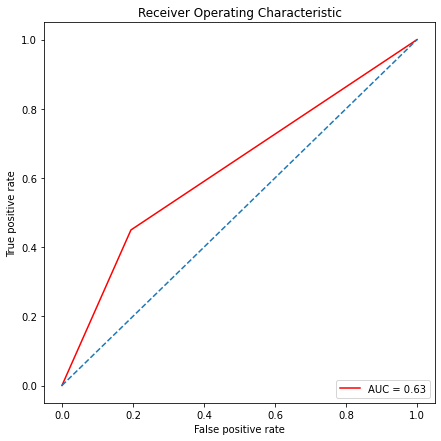

In [669]:
plot_roc(roc_auc)